In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
from datetime import datetime

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_6041/1493323324.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
df=pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,BE,Belgium,EURO,0,0,0,0
1,2020-01-04,BE,Belgium,EURO,0,0,0,0
2,2020-01-05,BE,Belgium,EURO,0,0,0,0
3,2020-01-06,BE,Belgium,EURO,0,0,0,0
4,2020-01-07,BE,Belgium,EURO,0,0,0,0


In [3]:
df_italy = df[df['Country_code'] == 'IT']
df_italy['Date_reported'] = pd.to_datetime(df_italy['Date_reported'])

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_6041/1937666387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy['Date_reported'] = pd.to_datetime(df_italy['Date_reported'])


In [5]:
df_max_scaled = df_italy.copy()
  
# apply normalization techniques on Column 1
df_max_scaled["norm_new_cases"] = df_max_scaled["New_cases"] /df_max_scaled["New_cases"].abs().max()
df_max_scaled["norm_new_cases"].to_csv("/Users/linaruiz/Documents/projectEpidemicCurve/comparingLanguages/normalizadosPython.csv",index=False)
df_max_scaled["norm_new_cases"]

5994    0.000000
5995    0.000000
5996    0.000000
5997    0.000000
5998    0.000000
          ...   
6988    0.098732
6989    0.092419
6990    0.098017
6991    0.082385
6992    0.043862
Name: norm_new_cases, Length: 999, dtype: float64

With the gaussian function

In [24]:
b=28/2
df_max_scaled["smoothed_new_cases"] = gaussian_filter(df_max_scaled['norm_new_cases'], b)
df_max_scaled["smoothed_new_cases"]

5994    1.966053e-07
5995    2.140056e-07
5996    2.425934e-07
5997    2.979717e-07
5998    3.652036e-07
            ...     
6988    7.797321e-02
6989    7.791185e-02
6990    7.786803e-02
6991    7.783993e-02
6992    7.782736e-02
Name: smoothed_new_cases, Length: 999, dtype: float64

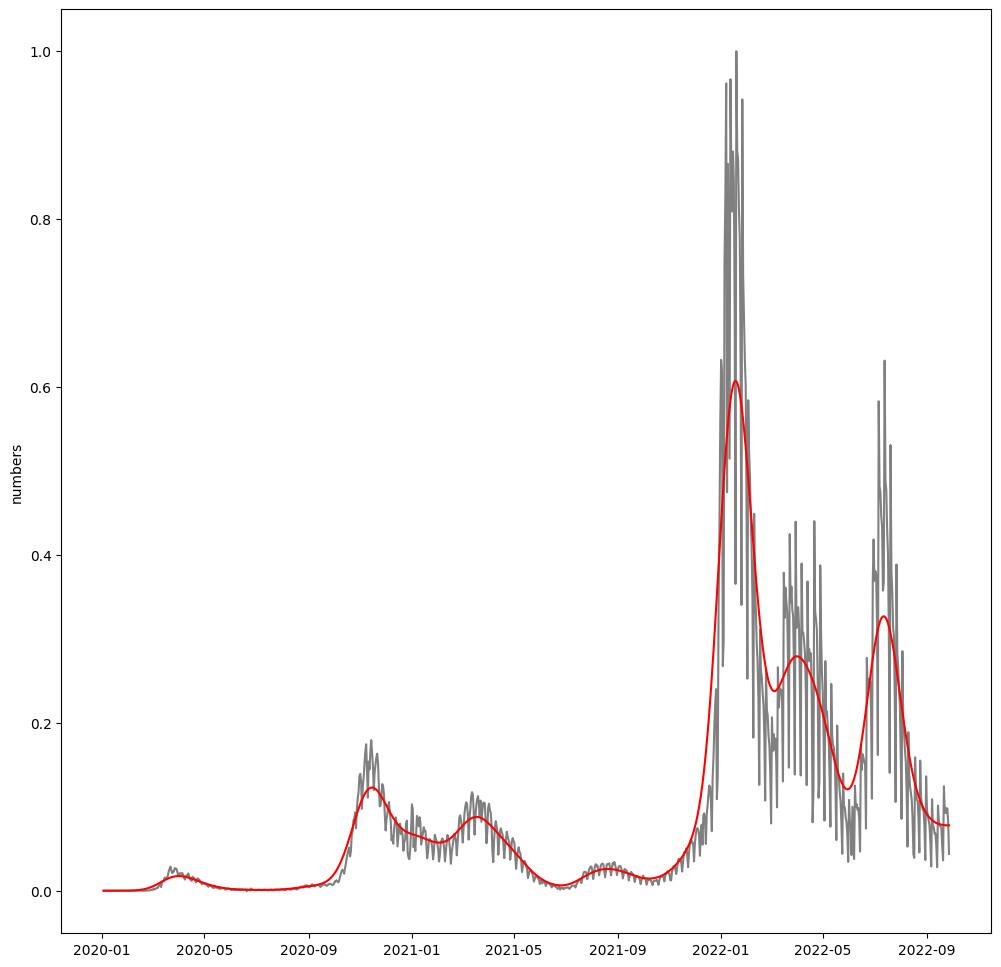

In [12]:
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases"],color="red")
plt.ylabel('numbers')
plt.show()

Manually

Por qué en el siguiente código usa la variable "Date_reported" si en la built-in function solo se usa "df_max_scaled['norm_new_cases']"

In [15]:
smoothed_cases = []
b=28/2
for date in sorted(df_max_scaled['Date_reported']):
    df_max_scaled['gaussian'] =np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    )
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append((df_max_scaled['norm_new_cases'] * df_max_scaled['gaussian']).sum())

df_max_scaled['smoothed_new_cases2'] = smoothed_cases

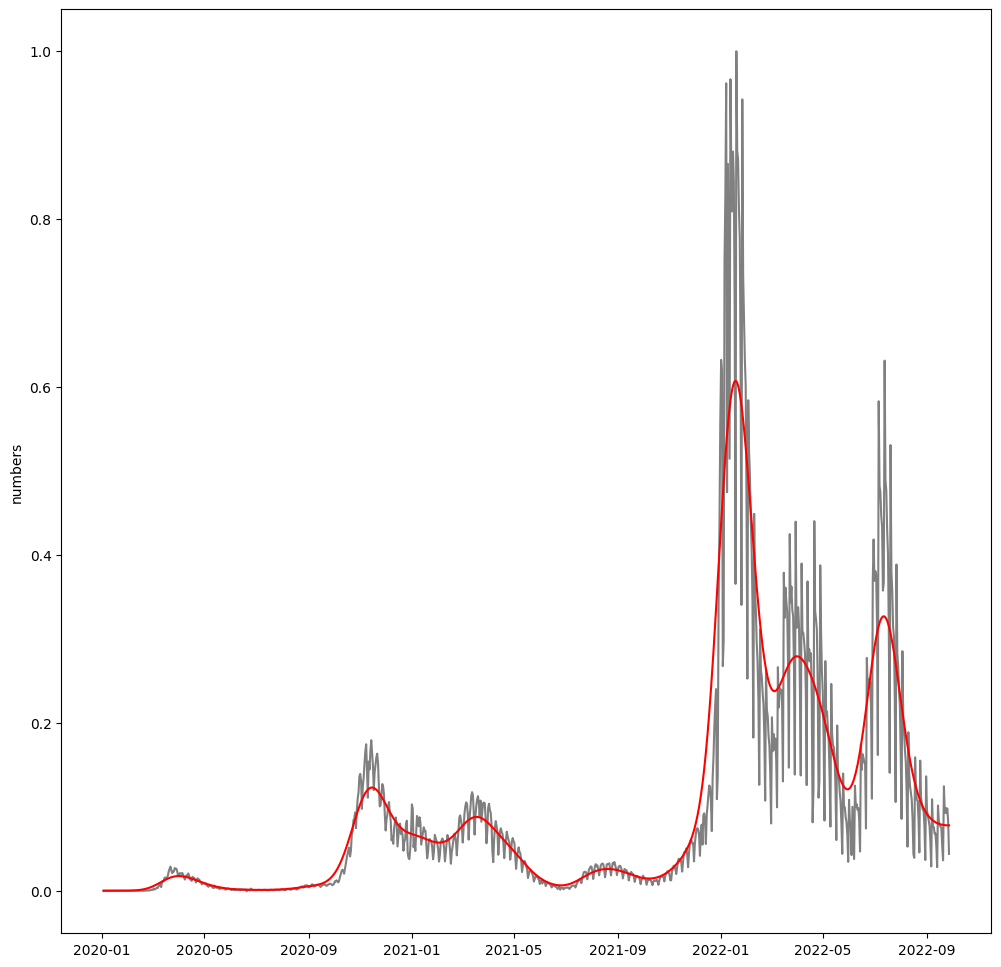

In [16]:
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases2"],color="red")
plt.ylabel('numbers')
plt.show()

are they the same?

In [22]:
df_max_scaled['smoothed_new_cases']

5994    1.966053e-07
5995    2.140056e-07
5996    2.425934e-07
5997    2.979717e-07
5998    3.652036e-07
            ...     
6988    7.797321e-02
6989    7.791185e-02
6990    7.786803e-02
6991    7.783993e-02
6992    7.782736e-02
Name: smoothed_new_cases, Length: 999, dtype: float64

In [23]:
df_max_scaled['smoothed_new_cases2']

5994    3.312832e-07
5995    3.985310e-07
5996    4.815014e-07
5997    5.840697e-07
5998    7.110547e-07
            ...     
6988    7.801315e-02
6989    7.793944e-02
6990    7.788689e-02
6991    7.785314e-02
6992    7.783597e-02
Name: smoothed_new_cases2, Length: 999, dtype: float64

In [20]:
df_max_scaled['smoothed_new_cases2']==df_max_scaled['smoothed_new_cases']

5994    False
5995    False
5996    False
5997    False
5998    False
        ...  
6988    False
6989    False
6990    False
6991    False
6992    False
Length: 999, dtype: bool

Identificando qué hace el codigo manual:

In [ ]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    df_max_scaled['gaussian'] =np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    )
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append((df_max_scaled['norm_new_cases'] * df_max_scaled['gaussian']).sum())

df_max_scaled['smoothed_new_cases'] = smoothed_cases

In [ ]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(df_max_scaled['Date_reported'] - date)
    

In [ ]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days))

In [ ]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days))**2)

In [ ]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    ))

In [ ]:
np.exp(0)

In [ ]:
df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()

END

In [ ]:
from datetime import datetime
df_max_scaled['gkv_1'] = np.exp(
    -(((df_max_scaled['Date_reported'] - datetime(2020, 1, 5)).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
)

np.exp(-((1)** 2) / (2 * (2 ** 2)))
df_max_scaled['gkv']=df_max_scaled['gkv_1'] / df_max_scaled['gkv_'].sum()
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["gaussian"])

In [ ]:
import numpy as np
smoothed_cases = []
for date in sorted(df_belgium['Date_reported']):
    df_belgium['gaussian'] =np.exp(
        -(((df_belgium['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
    )
    df_belgium['gaussian'] /= df_belgium['gaussian'].sum()
    smoothed_cases.append(round(df_belgium['New_cases'] * df_belgium['gaussian']).sum())

df_belgium['smoothed_new_cases4'] = smoothed_cases
